<a href="https://www.kaggle.com/code/mesutssmn/bbc-document-nlp-ml-ann?scriptVersionId=172214751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:40px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:150%; text-align:left">

    
<h3 align="center"><font color='#50000' size=150%>BBC NLP</font></h3>

    
<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://media.licdn.com/dms/image/C5112AQFp9T2pPYb7Kw/article-cover_image-shrink_720_1280/0/1537766475538?e=2147483647&v=beta&t=W4eoqGy7WoyeYJidMfcs5JplfzRIKIIIYMnKJ3f_u28" alt="Red Wine" width="1000">
</div>
</div>
    

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTS </div>

In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2024-04-16 00:53:11.232716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 00:53:11.232835: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 00:53:11.398631: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LOADING DATA </div>

In [2]:
df=pd.read_csv('/kaggle/input/bbc-full-text-document-classification/bbc_data.csv')
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA INFORMATION AND CLEANING  </div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
df[df.labels == "entertainment"].data[3]

'Snicket tops US box office chart  The film adaptation of Lemony Snicket novels has topped the North America box office chart, displacing Oceans 12.  A Series of Unfortunate Events, starring Jim Carrey, took $30.2m (xc2xa315.5m) in its debut weekend. Oceans 12 fell to number two while new entry Spanglish entered the chart at number three, taking $9m (xc2xa34.6m). A Series of Unfortunate Events also stars Scottish comedian Billy Connelly, while Carrey takes on a number of different roles in the surreal film. The only other new entry in the top 10 was re-make, Flight of the Phoenix, at number eight, starring Dennis Quaid. Carrey entertained crowds at the UK premiere of Lemony Snicket in London on Friday. The actor grabbed co-star Meryl Streep and whisked her around Leicester Square. Based on the cult childrens books by author Daniel Handler, the film follows three children who are orphaned when their parents die in a fire. They are taken in by their wicked uncle Count Olaf, played by Car

In [5]:
df.labels.unique()

array(['entertainment', 'business', 'sport', 'politics', 'tech'],
      dtype=object)

In [6]:
df.labels = df.labels.map({'entertainment':0, 'business':1, 'sport':2, 'politics':3, 'tech':4})

In [7]:
df.labels.value_counts()

labels
2    511
1    510
3    417
4    401
0    386
Name: count, dtype: int64

In [8]:
df.data=df.data.str.lower()

In [9]:
for punc in string.punctuation:
    df.data=df.data.str.replace(punc,"")

In [10]:
df.data

0       musicians to tackle us red tape  musicians gro...
1       u2s desire to be number one  u2 who have won t...
2       rocker doherty in onstage fight  rock singer p...
3       snicket tops us box office chart  the film ada...
4       oceans twelve raids box office  oceans twelve ...
                              ...                        
2220    warning over windows word files  writing a mic...
2221    fast lifts rise into record books  two highspe...
2222    nintendo adds media playing to ds  nintendo is...
2223    fast moving phone viruses appear  security fir...
2224    hacker threat to apples itunes  users of apple...
Name: data, Length: 2225, dtype: object

In [11]:
y = df['labels']
X = df.drop('labels', axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train

,data
447,s korea spending boost to economy south korea...
1255,bristol city 21 milton keynes leroy lita took...
1342,edgy agassi struggles past dent andre agassi ...
1761,more to do on adult literacy the government w...
1263,gatlin and hayes win owen awards american oly...
...,...
1638,labours cunningham to stand down veteran labo...
1095,collins to compete in birmingham world and co...
1130,juninho demand for oneill talks juninhos agen...
1294,wenger shock at newcastle dip arsenal manager...


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> WORD CLOUD  </div>

In [14]:
def plot_wordcloud(text, title=None, save_path=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    plt.show()


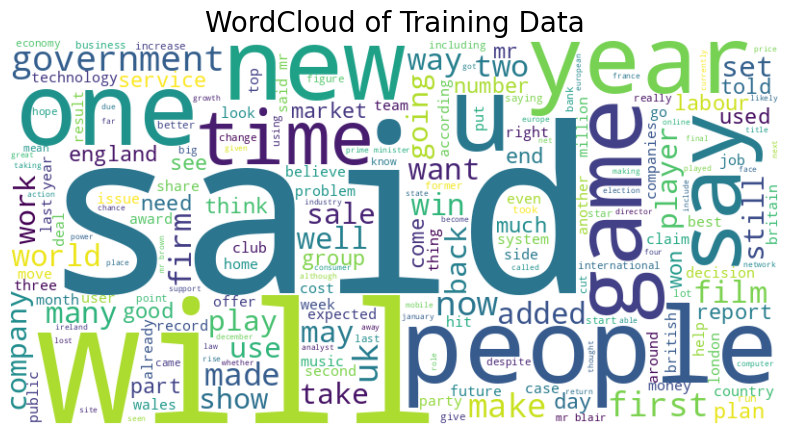

In [15]:
all_text = ' '.join(X_train['data'])
plot_wordcloud(all_text, title='WordCloud of Training Data', save_path=None)


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML MODELLING </div>

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> RANDOM FOREST </div>

In [16]:
def rf_model(vectorizer, classifier, X_grid, y_grid):    
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])

    hyperparameters = {
        'vectorizer__stop_words': ['english'],
        'vectorizer__ngram_range': [(1, 2), (1, 3),(1, 4)],
        'vectorizer__max_features': [2000, None],
        'vectorizer__max_df': [0.9, 0.95, 1.0],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 8]}

    grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_grid, y_grid)

    print("Best hyperparameters:", grid_search.best_params_)

In [17]:
"""rf_model(vectorizer = CountVectorizer(),
classifier = RandomForestClassifier(),
X_grid = X_train['data'],
y_grid = y_train)"""

"rf_model(vectorizer = CountVectorizer(),\nclassifier = RandomForestClassifier(),\nX_grid = X_train['data'],\ny_grid = y_train)"

In [18]:
def vec_pred(model,max_df,max_features,ngram_range,stop_words,n_estimators,max_depth=None, learning_rate=None):
    best_vectorizer = CountVectorizer(max_df=max_df, max_features=max_features, ngram_range=ngram_range, stop_words=stop_words)
    X_train_vector = best_vectorizer.fit_transform(X_train['data'])
    best_classifier = model(n_estimators=n_estimators, max_depth=max_depth)
    best_classifier.fit(X_train_vector, y_train)
    X_test_vector = best_vectorizer.transform(X_test['data'])
    y_pred = best_classifier.predict(X_test_vector)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    class_labels = ['entertainment', 'business','sport','politics','tech']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       103
           1       0.93      0.97      0.95       133
           2       0.99      1.00      1.00       119
           3       0.95      0.97      0.96        98
           4       0.96      0.93      0.95       104

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



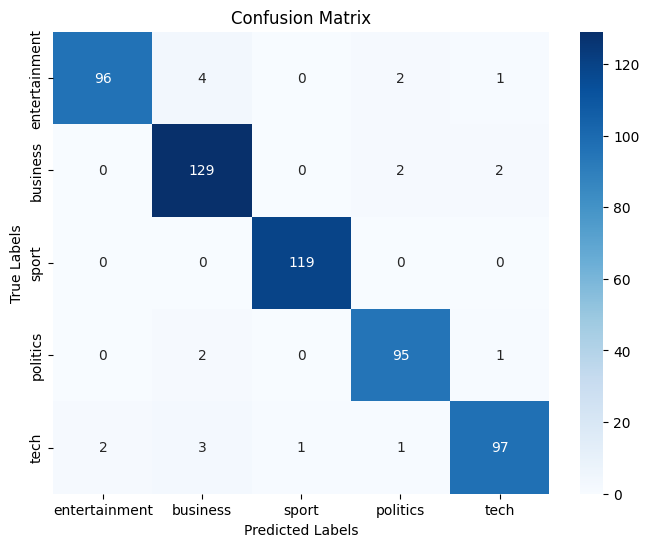

In [19]:
vec_pred(RandomForestClassifier,1.0,2000,(1, 3),"english",200)

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> XGBOOST </div>

In [20]:
def pipe_boosting(vectorizer, classifier, X_grid, y_grid):    
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])

    hyperparameters = {
        'vectorizer__stop_words': ['english'],
        'vectorizer__ngram_range': [(1, 3)],
        'vectorizer__max_features': [2000],
        'vectorizer__max_df': [1.0],
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]}

    grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_grid, y_grid)

    print("Best hyperparameters:", grid_search.best_params_)

In [21]:
def vec_pred(model,max_df,max_features,ngram_range,stop_words,n_estimators,max_depth=None, learning_rate=None, verbose = None):
    best_vectorizer = CountVectorizer(max_df=max_df, max_features=max_features, ngram_range=ngram_range, stop_words=stop_words)
    X_train_vector = best_vectorizer.fit_transform(X_train['data'])
    best_classifier = model(n_estimators=n_estimators, max_depth=max_depth, verbose = verbose)
    best_classifier.fit(X_train_vector, y_train)
    X_test_vector = best_vectorizer.transform(X_test['data'])
    y_pred = best_classifier.predict(X_test_vector)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    class_labels = ['entertainment', 'business','sport','politics','tech']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [22]:
"""pipe_boosting(vectorizer = CountVectorizer(),
classifier = XGBClassifier(device="cuda"),
X_grid = X_train['data'],
y_grid = y_train)"""

'pipe_boosting(vectorizer = CountVectorizer(),\nclassifier = XGBClassifier(device="cuda"),\nX_grid = X_train[\'data\'],\ny_grid = y_train)'

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       103
           1       0.94      0.95      0.94       133
           2       0.98      1.00      0.99       119
           3       0.93      0.95      0.94        98
           4       0.94      0.93      0.94       104

    accuracy                           0.96       557
   macro avg       0.96      0.95      0.95       557
weighted avg       0.96      0.96      0.96       557



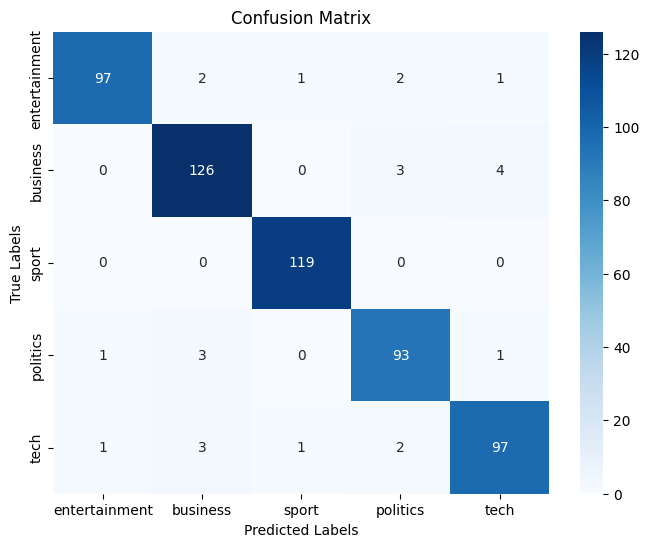

In [23]:
vec_pred(XGBClassifier,1.0,2000,(1, 3),"english",100, 5, 0.02)

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> CATBOOST </div>

In [24]:
"""pipe_boosting(vectorizer = CountVectorizer(),
classifier = CatBoostClassifier(verbose = False),
X_grid = X_train['data'],
y_grid = y_train)"""

"pipe_boosting(vectorizer = CountVectorizer(),\nclassifier = CatBoostClassifier(verbose = False),\nX_grid = X_train['data'],\ny_grid = y_train)"

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       103
           1       0.96      0.96      0.96       133
           2       0.98      1.00      0.99       119
           3       0.94      0.98      0.96        98
           4       0.96      0.94      0.95       104

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



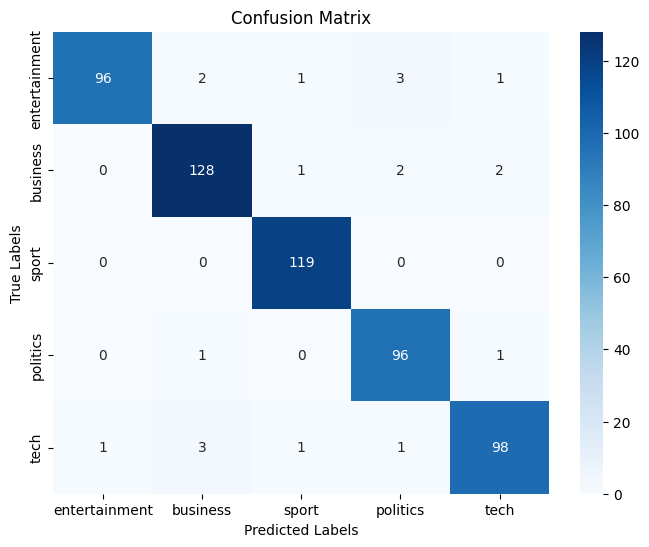

In [25]:
vec_pred(CatBoostClassifier,1.0,2000,(1, 3),"english",200, 5, 0.07, verbose = False)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ANN MODEL </div>

In [26]:
c_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 3))
X_train_vector = c_vectorizer.fit_transform(X_train['data'])
X_test_vector = c_vectorizer.transform(X_test['data'])

In [27]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train_vector.shape[1],), activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(5, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │    74,860,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,871,845 (285.61 MB)

 Trainable params: 74,871,589 (285.61 MB)

 Non-trainable params: 256 (1.00 KB)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=3,
    min_delta=0.01,
    restore_best_weights=True,
)

In [29]:
X_train_vector

<1668x584845 sparse matrix of type '<class 'numpy.int64'>'
	with 895850 stored elements in Compressed Sparse Row format>

In [30]:
history = model.fit(X_train_vector.toarray(), y_train, epochs=30, callbacks=[early_stopping], validation_split = 0.2)

Epoch 1/30
 2/42 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.2891 - loss: 1.5959

I0000 00:00:1713228854.279345      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713228854.299014      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.7303 - loss: 0.9071

W0000 00:00:1713228868.614207      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 405ms/step - accuracy: 0.7329 - loss: 0.9029 - val_accuracy: 0.9042 - val_loss: 0.6216
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.5467 - loss: 1.2844 - val_accuracy: 0.9401 - val_loss: 0.5263
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7712 - loss: 0.8456 - val_accuracy: 0.9491 - val_loss: 0.4141
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8954 - loss: 0.5511 - val_accuracy: 0.9551 - val_loss: 0.3313
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9546 - loss: 0.3744 - val_accuracy: 0.9641 - val_loss: 0.2609
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9701 - loss: 0.2752 - val_accuracy: 0.9671 - val_loss: 0.2174
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9848 - loss: 0.1888 - val_accuracy: 0.9701 - val_loss: 0.1811
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9912 - loss: 0.1515 - val_accuracy: 0.9671 - val

In [31]:
loss_and_metrics = model.evaluate(X_test_vector.toarray(), y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9784 - loss: 0.1153
Loss =  0.1337873339653015
Accuracy =  0.9748653769493103


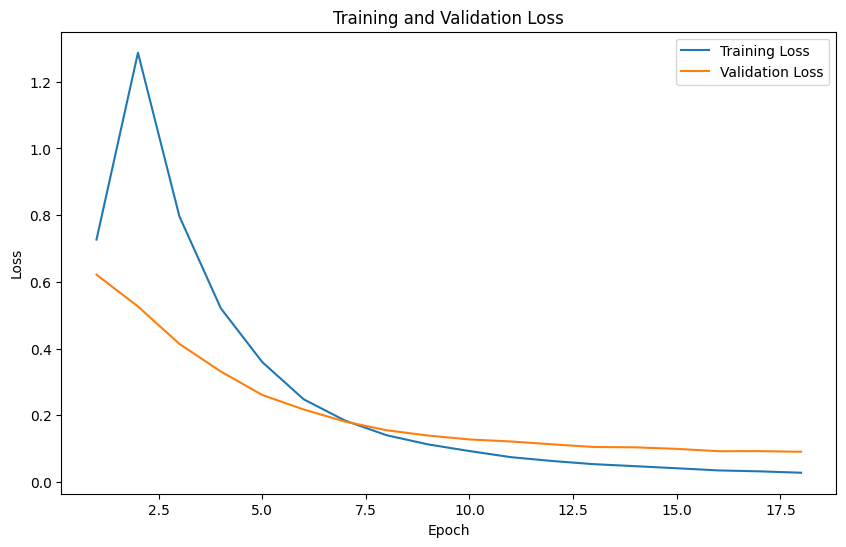

In [32]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [33]:
predicted = model.predict(X_test_vector.toarray())
predicted_classes = np.argmax(predicted, axis=1)
predicted_classes

 3/18 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

W0000 00:00:1713228964.338070      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


array([1, 1, 3, 1, 2, 3, 3, 2, 1, 2, 0, 1, 3, 0, 1, 1, 4, 1, 0, 1, 0, 3,
       0, 1, 0, 2, 1, 3, 2, 3, 3, 2, 4, 1, 3, 1, 1, 3, 4, 3, 4, 2, 0, 3,
       4, 4, 4, 1, 0, 4, 1, 1, 2, 0, 1, 2, 2, 2, 3, 0, 0, 1, 1, 0, 3, 1,
       0, 0, 2, 3, 2, 2, 4, 3, 0, 3, 3, 1, 0, 0, 3, 3, 0, 1, 1, 3, 3, 2,
       1, 3, 2, 0, 2, 0, 3, 0, 1, 1, 0, 2, 0, 2, 4, 0, 2, 2, 3, 4, 1, 2,
       1, 4, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 4, 4, 4, 1, 0, 1, 3, 1,
       1, 2, 3, 2, 0, 0, 1, 4, 1, 3, 2, 0, 4, 1, 4, 1, 0, 2, 3, 1, 1, 4,
       4, 3, 2, 1, 0, 1, 4, 1, 1, 2, 4, 1, 0, 4, 4, 1, 2, 3, 4, 1, 3, 4,
       2, 2, 1, 2, 2, 3, 0, 2, 4, 3, 1, 3, 4, 0, 0, 2, 1, 4, 4, 1, 2, 2,
       3, 4, 2, 1, 0, 4, 0, 2, 2, 2, 2, 3, 3, 2, 4, 1, 3, 2, 4, 4, 0, 4,
       0, 0, 0, 3, 2, 2, 2, 2, 0, 1, 3, 3, 1, 2, 4, 3, 1, 0, 4, 0, 3, 1,
       2, 3, 0, 0, 0, 0, 3, 0, 2, 3, 4, 0, 1, 3, 1, 3, 3, 3, 2, 4, 0, 1,
       3, 1, 2, 3, 1, 1, 1, 0, 0, 1, 0, 3, 1, 2, 4, 0, 0, 4, 0, 1, 1, 4,
       2, 3, 1, 4, 0, 4, 0, 1, 2, 0, 0, 4, 1, 4, 3,

In [34]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       103
           1       0.98      0.97      0.97       133
           2       1.00      0.99      1.00       119
           3       0.92      1.00      0.96        98
           4       0.99      0.96      0.98       104

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.98      0.97      0.98       557



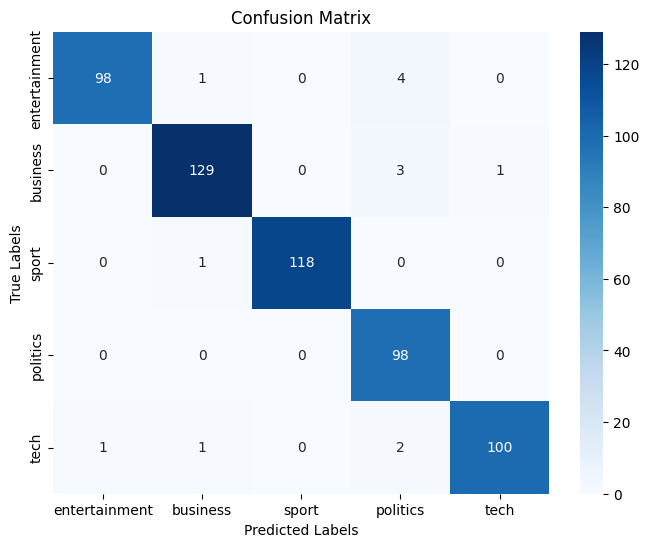

In [35]:
cm = confusion_matrix(y_test, predicted_classes)

# Define class labels
class_labels = ['entertainment', 'business','sport','politics','tech']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()